In [291]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

***
# 1. Understand Business Problems
AtliQ is facing a significant challenge from its competitors, which means it is losing its revenue and market share. As a result, the CEO of AtliQ has decided to onboard data analytics using Python to make data-informed decisions so that it can increase its revenue.

## We will answer the following questions in the process of insights generation.
1. What is the average occupancy rate in each of the room categories?
2. What is the average occupancy rate per city?
3. What are the average occupancy rates for weekdays and weekends, and which one is better, weekdays or weekends?
4. What were the average occupancy rates in different cities in June?
5. We got new data for the month of August. Append that to existing data.
6. What is the total revenue_realised per city?
7. What is the month-by-month revenue?
8. What is the total revenue realized per hotel type?
9. Create a bar chart to show the average rating per city. 
10. Create a pie chart to show the total revenue realized per booking platform.

***
# 2. Data Import and Data Exploration
We will gain a comprehensive understanding of the dataset in this stage.

In [170]:
# Read bookings data in a dataframe
df_bookings = pd.read_csv("datasets/fact_bookings.csv")
df_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640


In [171]:
# Display the first few rows of df_bookings
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [172]:
# Obtain the shape of bookings data
df_bookings.shape

(134590, 12)

In [173]:
# Retrieve the unique values from the "room_category" column of 'df_bookings'
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [174]:
# Retrieve the unique values from the "booking_platform" column of 'df_bookings'
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [175]:
# Count the occurrences of each unique value in the 'booking_platform' column of 'df_bookings'.
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

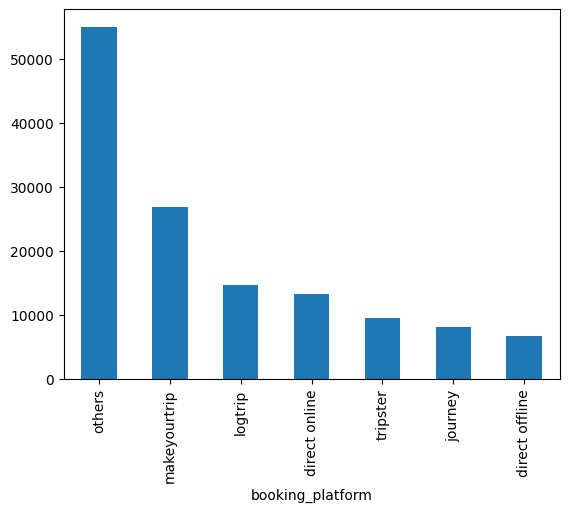

In [176]:
# Create a bar plot
df_bookings.booking_platform.value_counts().plot(kind = 'bar')

<Axes: ylabel='booking_platform'>

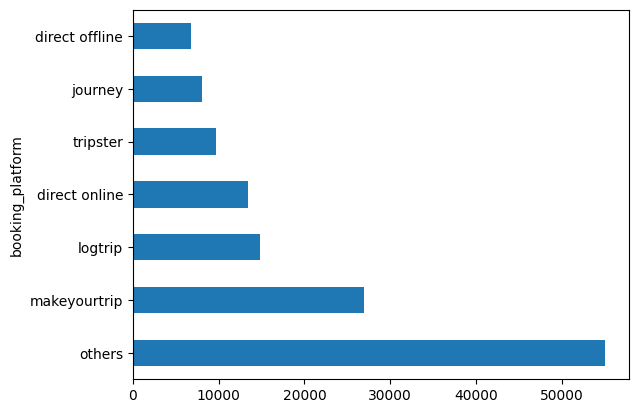

In [177]:
# Creates a horizontal bar plot
df_bookings.booking_platform.value_counts().plot(kind = 'barh')

In [178]:
# Use describe() method to generate descriptive statistics of the DataFrame
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


### We are going to dive into this datafram for gaining insights into the data quickly, understanding its distribution, identifying potential outliers, and check any errors.
- It is obvious that our average rating is 3.62 which still has a big room for improvement.
- There is an error in the no_guests column, which the mean is -17.
- Maximum revenue is 2856000 which is an apparent data error, so we are going to clean the data in the data cleaning process.

In [179]:
# Use min() & max() for checking errors in revenue_generated column
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 28560000)

In [180]:
# Read the remaining csv files
df_date = pd.read_csv('datasets/dim_date.csv')
df_hotels = pd.read_csv('datasets/dim_hotels.csv')
df_rooms = pd.read_csv('datasets/dim_rooms.csv')
df_agg_bookings = pd.read_csv('datasets/fact_aggregated_bookings.csv')

##### df_hotels

In [181]:
# Display the first few rows of 'df_hotels'
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [182]:
# Obtain the shape of 'df_hotels'
df_hotels.shape

(25, 4)

In [183]:
# Retrieve the unique values from the "property_name" column of 'df_hotels'
df_hotels.property_name.unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [184]:
# Count the occurrences of each unique value in the 'category' column of the 'df_hotels'
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [185]:
# Count the occurrences of each unique value in the 'city' column of the 'df_hotels'
df_hotels.city.value_counts().sort_values(ascending = False)

city
Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: count, dtype: int64

<Axes: xlabel='city'>

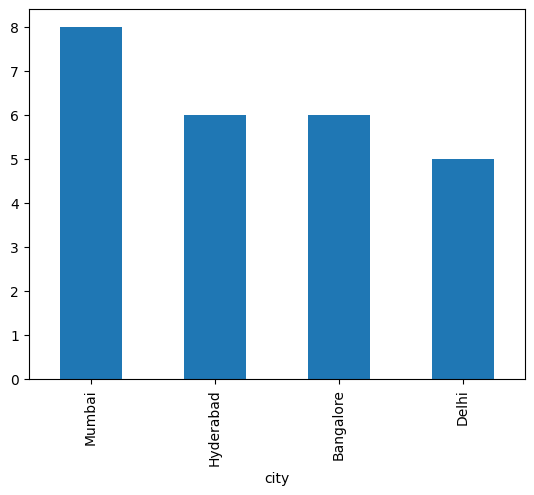

In [186]:
# Create a bar plot
df_hotels.city.value_counts().sort_values(ascending = False).plot(kind = 'bar')

##### df_date

In [187]:
# Display the first few rows of 'df_date'
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [188]:
# Obtain the shape of 'df_date'
df_date.shape

(92, 4)

##### df_rooms

In [189]:
# Display the first few rows of 'df_rooms'
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [190]:
# Obtain the shape of 'df_rooms'
df_rooms.shape

(4, 2)

##### df_agg_bookings

In [191]:
# Display the first few rows of 'df_agg_bookings'
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


- #### It is noticeable that there is a row in which successful_bookings is greater than capacity, which needed to be cleaned in the data cleaning process.

In [192]:
# Obtain the shape of 'df_agg_bookings'
df_agg_bookings.shape

(9200, 5)

In [193]:
# Use describe() method to generate descriptive statistics of the DataFrame
df_agg_bookings.describe()

,property_id,successful_bookings,capacity
count,9200.000000,9200.000000,9198.000000
mean,18040.640000,14.655761,25.280496
std,1099.818325,7.736170,11.442080
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,123.000000,50.000000


In [194]:
# Retrieve the unique values from the "property_id" column of 'df_agg_bookings'
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

In [195]:
# Group by property_id and show sum of successful_bookings in descending order
df_agg_bookings.groupby('property_id')['successful_bookings'].sum().sort_values(ascending = False)

property_id
16559    7338
18562    7333
16563    7211
18560    6638
18561    6458
17563    6337
17559    6142
19560    6079
17560    6013
19562    5812
19561    5736
19563    5413
18559    5256
17561    5183
17558    5053
16562    4820
18563    4737
19559    4729
16560    4693
18558    4475
16561    4418
19558    4400
17564    3982
17562    3424
16558    3153
Name: successful_bookings, dtype: int64

In [196]:
# Retrieve the rows which successful_boookings is greater than capacity
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [197]:
# Find the maximum value of the 'capacity' column in 'df_agg_bookings'.
df_agg_bookings.capacity.max()

50.0

In [198]:
# Retrieve rows where the 'capacity' column has a value equal to the maximum capacity value in df_agg_bookings'
df_agg_bookings[df_agg_bookings.capacity == df_agg_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


***
# 3. Data Cleaning
We are going to identify and handle missing or erroneous data to ensure accuracy and reliability.

### Contents of data cleaning
1. Remove rows with negative values in no_guests
2. Find the error in revenue_generated
3. Clean data in revenue_realized
4. Check null values in each column
5. Check duplicate rows in each column
6. Remove the records that have successful_bookings value greater than capacity

In [199]:
# Use describe() method to generate descriptive statistics of the DataFrame
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


- #### We need to remove rows with negative values in no_guests.
- #### Furthermore, it is impossible to get 28560000 revenue for a single booking. Hence we need to find out what is going wrong in that column.

In [200]:
# Display the first few rows of 'df_bookings' again
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


***
## Remove rows with negative values in no_guests.
***

In [201]:
# Retrieve rows where the value in the column "no_guests" is less than or equal to zero.
df_bookings[df_bookings.no_guests <= 0 ]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [202]:
# Obtain the shape of bookings data again
df_bookings.shape

(134590, 12)

In [203]:
# There are only 12 rows with negative or zero values in no_guests, and we decided to get rid of the rows
# Store the dataframe with only positive values in no_guests
df_bookings = df_bookings[df_bookings.no_guests >=0]
df_bookings.shape

(134578, 12)

***
## Find the error in revenue_generated
***

In [204]:
# Use min() & max() for checking errors in revenue_generated column
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 28560000)

In [205]:
# We are going to remove outliers which is greater three standard deviation
# Fetch the mean and standard deviation from df_boooikngs_revenue_generated
avg, stv = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()
avg, stv

(15378.036937686695, 93040.1549314641)

In [206]:
# Benchmark for finding outliers
higher_limit = avg + 3*stv
higher_limit

294498.50173207896

In [207]:
# Benchmark for finding outliers
lower_limit = avg - 3*stv
lower_limit

-263742.4278567056

- #### It is impossible to get a negative value for a single booking, but we still need to verify it.

In [208]:
# Retrieve rows where the value in "revenue_generated" is less than zero.
df_bookings[df_bookings.revenue_generated < 0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [209]:
# Retrieve all of the outliers
df_bookings[df_bookings.revenue_generated > higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


- #### Keep the dataframe without any outliers. As a result, we need to store the dataframe without any outliers.

In [210]:
df_bookings = df_bookings[df_bookings.revenue_generated < higher_limit]
df_bookings.shape

(134573, 12)

- #### The previous dataframe only has 134578 rows and 12 columns which means we have removed the outliers.

***
## Clean data in revenue_realized
***

In [211]:
# Receive a summary of the statistical properties of the revenue_realized
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

- #### The maximum value is 45220 and we need to verify it by using standard deviation.

In [212]:
higher_limit = df_bookings.revenue_realized.mean() + 3* df_bookings.revenue_realized.std()
higher_limit

33479.358661845814

- #### This time, we want to dig further to see if 45220 is an outlier.
- #### Check how many rows are greater than higher_limit

In [213]:
df_bookings[df_bookings.revenue_realized > higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


- #### There are 1299 rows greater than higher_limit which are all belonging to the RT4 room.
- #### Check what the category of the RT4 room is.

In [214]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


- #### RT4 is a presidential suite which is more expensive than other types of rooms. As a result, we would like to use standard deviation for just the RT4 room.
- #### Before using standard deviation, we would like to generate descriptive statistics of the RT4 room.

In [215]:
df_bookings[df_bookings.room_category == 'RT4'].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [216]:
# Use mean and standard deviation to find outliers
df_bookings[df_bookings.room_category == 'RT4'].revenue_realized.mean() + 3*df_bookings[df_bookings.room_category == 'RT4'].revenue_realized.std()

50585.10567100048

- #### The max value of RT4 revenue_realized is smaller than 50585, which indicates that there is no outlier in the RT4 room.
- #### Hence we can conclude that there is no outlier and no need to do any data cleaning in this column.

***
## Check null values in each column
***

### Check null values in df_bookings

In [217]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

- #### It is quite common for a guest to simply stay at the hotel and leave without leaving any comments. Therefore, there is no need to change the null value in ratings_given.

### Check null values in df_agg_bookings

In [218]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

- #### There are two rows with null values. Therefore, we would like to fill them with mean.

In [219]:
# Retrieve the rows with null values in capacity
df_agg_bookings[df_agg_bookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [220]:
# Calculate the median value of the 'capacity' column.
df_agg_bookings.capacity.median()

25.0

In [221]:
# Fill the missing values in the 'capacity' with the median value of that column.
df_agg_bookings.fillna(df_agg_bookings.capacity.median(), inplace = True)

In [222]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [223]:
# Retrieve specific rows from df_agg_bookings based on their indices.
df_agg_bookings.loc[[8,14]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
14,17562,1-May-22,RT1,12,25.0


### Check null values in df_rooms

In [224]:
df_rooms.isnull().sum()

room_id       0
room_class    0
dtype: int64

### Check null values in df_hotels

In [225]:
df_hotels.isnull().sum()

property_id      0
property_name    0
category         0
city             0
dtype: int64

### Check null values in df_date

In [226]:
df_date.isnull().sum()

date        0
mmm yy      0
week no     0
day_type    0
dtype: int64

***
## Check duplicate rows in each column
***

In [227]:
df_bookings[df_bookings.duplicated()].sum()

booking_id             0
property_id            0
booking_date           0
check_in_date          0
checkout_date          0
no_guests            0.0
room_category          0
booking_platform       0
ratings_given        0.0
booking_status         0
revenue_generated      0
revenue_realized       0
dtype: object

In [228]:
df_hotels[df_hotels.duplicated()].sum()

property_id      0
property_name    0
category         0
city             0
dtype: object

In [229]:
df_rooms[df_rooms.duplicated()].sum()

room_id       0
room_class    0
dtype: object

In [230]:
df_agg_bookings[df_agg_bookings.duplicated()].sum()

property_id              0
check_in_date            0
room_category            0
successful_bookings      0
capacity               0.0
dtype: object

In [231]:
df_date[df_date.duplicated()].sum()

date        0
mmm yy      0
week no     0
day_type    0
dtype: object

***
## Remove the records that have successful_bookings value greater than capacity.
***

In [232]:
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [233]:
df_agg_bookings.shape

(9200, 5)

In [234]:
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings <= df_agg_bookings.capacity]

In [235]:
df_agg_bookings.shape

(9194, 5)

***
# 4. Data Transformation
- We are going to convert data into a suitable format for analysis or modeling tasks.
- Data transformation helps in uncovering insights, patterns, and relationships that might not be apparent in the original raw data.
***

In [236]:
# Display the first few rows of 'df_hotels'
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0


In [237]:
# Create a new column in the dataframe which shows occupancy percentage
df_agg_bookings["occ_pct"] = df_agg_bookings["successful_bookings"] / df_agg_bookings["capacity"]

In [238]:
# Display the first few rows of 'df_hotels' again
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
4,16558,1-May-22,RT1,18,19.0,0.947368
5,17560,1-May-22,RT1,28,40.0,0.700000


In [239]:
# Use lambda to round occ_pct column to percentage in two decimals
df_agg_bookings["occ_pct"] = df_agg_bookings["occ_pct"].apply(lambda x : round(x*100, 2))
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00


***
# 5. Insights Generation
We are going to extract meaningful and actionable information from raw data. 

## We are going to answer the following questions.
1. What is the average occupancy rate in each of the room categories?
2. What is the average occupancy rate per city?
3. What are the average occupancy rates for weekdays and weekends, and which one is better, weekdays or weekends?
4. What were the average occupancy rates in different cities in June?
5. We got new data for the month of August. Append that to existing data.
6. What is the total revenue_realised per city?
7. What is the month-by-month revenue?
8. What is the total revenue realized per hotel type?
9. Create a bar chart to show the average rating per city. 
10. Create a pie chart to show the total revenue realized per booking platform.
***

### 1. What is the average occupancy rate in each of the room categories?

In [240]:
# Display the first few rows of df_agg_bookings
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00


In [241]:
# Perform a group-by operation based on the "room_category".
# Calculate each group's mean value of the "occ_pct" and round the result to two decimal places.
df_agg_bookings.groupby("room_category")["occ_pct"].mean().round(2).sort_values(ascending = False)

room_category
RT4    59.28
RT3    58.03
RT2    58.01
RT1    57.89
Name: occ_pct, dtype: float64

In [242]:
# Display the first few rows of df_rooms
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [243]:
# Merge df_rooms into df_agg_bookings to make it more readable.
df = pd.merge(df_agg_bookings, df_rooms, left_on = "room_category", right_on = "room_id")
df.tail() # Display the last few rows of df

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
9189,16563,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9190,16559,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9191,17558,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9192,19563,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9193,17561,31-Jul-22,RT4,3,4.0,75.00,RT4,Presidential


In [244]:
# Perform a group-by operation based on the "room_class".
# Calculate each group's mean value of the "occ_pct" and round the result to two decimal places.
df.groupby("room_class")["occ_pct"].mean().round(2).sort_values(ascending = False)

room_class
Presidential    59.28
Premium         58.03
Elite           58.01
Standard        57.89
Name: occ_pct, dtype: float64

In [245]:
# Remove duplicate data. For example, room_category and room_id are sharing same data.
# axis = 1 means drop the column, inplace means to replace the existing dataframe
df.drop("room_id", axis = 1, inplace = True)
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,Standard


#### 1. What is the average occupancy rate in each of the room categories?¶
-  As we can see, the standard, elite, premium, and presidential rooms have occupancy rates of 59.28%, 58.03%, 58.01%, and 57.89%, respectively.
-  The presidential room has the highest occupancy rate, while the standard room has the lowest occupancy rate.
-  However, there is not a significant difference in the occupancy rates among these four types of rooms; they all have around 58% of occupancy rate.

### 2. What is the average occupancy rate per city?

In [246]:
# Display the first few rows of df_hotels
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [247]:
# Display the first few rows of df
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,Standard


In [248]:
# Merge df_hotels into df
df = pd.merge(df, df_hotels, left_on = 'property_id', right_on = 'property_id')
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,4-May-22,RT1,21,30.0,70.00,Standard,Atliq Exotica,Luxury,Mumbai
4,16559,5-May-22,RT1,16,30.0,53.33,Standard,Atliq Exotica,Luxury,Mumbai


In [249]:
# Perform a group-by operation based on the "city".
# Calculate each group's mean value of the "occ_pct" and round the result to two decimal places.
df.groupby("city")["occ_pct"].mean().round(2).sort_values(ascending = False)

city
Delhi        61.51
Hyderabad    58.12
Mumbai       57.91
Bangalore    56.33
Name: occ_pct, dtype: float64

#### 2. What is the average occupancy rate per city?
- The result displays that the occupancy rates of Delhi, Hyderabad, Mumbai, and Bangalore are 61.51%, 58.12%, 57.91%, and 56.33%, respectively.
- Delhi has the highest occupancy rate, while Bangalore has the lowest occupancy rate.

### 3. What are the average occupancy rates for weekdays and weekends, and which one is better, weekdays or weekends?

- 'df' dataframe does not indicate whether the date is a weekday or weekend. Hence, we need to merge it with the 'df.date' dataframe.

In [250]:
# Display the first few rows of df
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,4-May-22,RT1,21,30.0,70.00,Standard,Atliq Exotica,Luxury,Mumbai
4,16559,5-May-22,RT1,16,30.0,53.33,Standard,Atliq Exotica,Luxury,Mumbai


In [251]:
# Display the first few rows of df_date
df_date.tail()

,date,mmm yy,week no,day_type
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend
91,31-Jul-22,Jul 22,W 32,weekend


In [252]:
# Merge df_date into df
df = pd.merge(df, df_date, left_on = 'check_in_date', right_on = 'date')
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,60.98,Elite,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
3,16559,10-May-22,RT4,13,18.0,72.22,Presidential,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
4,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday


In [253]:
# Perform a group-by operation based on the "day_type".
# Calculate each group's mean value of the "occ_pct" and round the result to two decimal places.

df.groupby('day_type')["occ_pct"].mean().round(2).sort_values(ascending = False)

day_type
weekend     72.34
weekeday    50.88
Name: occ_pct, dtype: float64

#### 3. What are the average occupancy rates for weekdays and weekends, and which one is better, weekdays or weekends?
- The occupancy rate on weekends is significantly greater than on weekdays.

***
#### To increase the occupancy rate on weekdays and generate more revenue for AtliQ, I have come up with two strategies:
- Targeted Marketing: Develop a targeted marketing campaign specifically tailored to attract weekday guests, such as highly-promoted weekday offers, special discounts, or discounted rates to incentivize them to choose weekdays for their stay.
- Loyalty Program: Develop a loyalty program that rewards guests for staying on weekdays. Offer exclusive benefits or discounts for repeat weekday and weekend guests to incentivize their loyalty and increase weekday occupancy.
***

### 4. What were the average occupancy rates in different cities in June?

In [254]:
# Retrieve the unique values from the "mmm yy" column of 'df'
df['mmm yy'].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [255]:
# Store df[df["mmm yy"] == 'Jun 22'] into a  new dataframe
df_june_22 = df[df["mmm yy"] == 'Jun 22']
df_june_22.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,16559,10-Jun-22,RT2,26,41.0,63.41,Elite,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2202,16559,10-Jun-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2203,16559,10-Jun-22,RT4,11,18.0,61.11,Presidential,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2204,19562,10-Jun-22,RT1,19,30.0,63.33,Standard,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday


In [256]:
# Perform a group-by operation based on the "city".
# Calculate each group's mean value of the "occ_pct" and round the result to two decimal places.
df_june_22.groupby("city")["occ_pct"].mean().round(2).sort_values(ascending = False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.44
Name: occ_pct, dtype: float64

#### 4. What were the average occupancy rates in different cities in June?
- The average occupancy rates of Delhi, Hyderabad, Mumbai, and Bangalore in June are 62.47%, 58.46%, 58.38%, and 56.44% respectively.

### 5. We got new data for the month of August. Append that to existing data.

In [257]:
# Read csv file
df_august = pd.read_csv("datasets/new_data_august.csv")
# Display the first few rows of df_august
df_august.head()

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92


In [258]:
# Obtain the shape of df_august data
df_august.shape

(7, 13)

In [259]:
# Retrieve columns in df_august
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [260]:
# Obtain the shape of df
df.shape

(6497, 14)

In [261]:
# Concatenates two DataFrames, df and df_august, vertically along the rows and name the new dataframe as latest_df
latest_df = pd.concat([df, df_august], ignore_index = True , axis = 0)
# Display the last few rows of latest_df
latest_df.tail()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
6499,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.67
6500,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
6501,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
6502,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
6503,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


In [262]:
# Obtain the shape of bookings data
latest_df.shape

(6504, 15)

#### We have successfully appended 7 rows and 1 column to create a new DataFrame, latest_df.

### 6. What is the total revenue_realised per city?

In [263]:
# Display the first few rows of df_bookings
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [264]:
# Display the first few rows of latest_df
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [265]:
# Merge df_bookings into df_hotels
df_all_bookings = pd.merge(df_bookings, df_hotels, on = "property_id")
# Display the first few rows of df_all_bookings
df_all_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [266]:
# Perform a group-by operation based on the "city".
# Calculate each group's mean value of the "revenue_realized" and round the result to two decimal places.
df_all_bookings.groupby('city')["revenue_realized"].sum().sort_values(ascending = False)

city
Mumbai       668569251
Bangalore    420383550
Hyderabad    325179310
Delhi        294404488
Name: revenue_realized, dtype: int64

#### 6. What is the total revenue_realised per city?
- The result indicates the revenue realization in each city, with Mumbai having the highest revenue, followed by Bangalore, Hyderabad, and Delhi.
- Mumbai may have a larger market size or higher demand for the services offered by AtliQ, resulting in higher revenue realization compared to other cities.

***
#### To increase the revenue realisation in Bangalore, Hyderabad, and Delhi for AtliQ. I have come up with one strategy:
1. Partnerships and Collaborations: Build partnerships with local businesses, travel agencies, or event organisers to tap into their networks and attract more customers. Collaborations can result in mutually beneficial marketing opportunities and increase revenue
***

### 7. What is the month-by-month revenue?

In [267]:
# Display the first few rows of df_all_bookings
df_all_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [268]:
# Display information about the df_all_bookings.
df_all_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [269]:
# Display the first few rows of df_date
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [270]:
# Display information about the df_date
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [271]:
# Retrieve the unique values from the "mmm yy" column of 'df_date'
df_date["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [272]:
# Merge these dataframes
pd.merge(df_all_bookings, df_date, left_on = "check_in_date", right_on = "date")

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type


#### <span style="color:red">The result is empty because the data format of 'check_in_date' and 'date' is not datetime.</span>
#### <span style="color:red">Hence, we need to convert the datatype of 'check_in_date' and 'date' from object to DateTime.</span>

In [273]:
# Convert the datatype of 'date' from object to DateTime.
df_date["date"] = pd.to_datetime(df_date["date"])
# Display the first few rows of df_date
df_date.head()

/var/folders/88/fr40bk2x10n_xn77yc1dlnjc0000gp/T/ipykernel_70313/63239447.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date["date"] = pd.to_datetime(df_date["date"])


,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday


In [274]:
# Display information about the df_date
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [275]:
# Convert the format of 'check_in_date' from object to Datetime.
# dayfirst = True is used to specify that the day comes before the month when parsing the dates. 
# errors='coerce' is set to handle any invalid or unparseable dates by converting them to NaT (Not a Time) values.
df_all_bookings["check_in_date"] = pd.to_datetime(df_all_bookings["check_in_date"], dayfirst = True, errors = 'coerce')


In [276]:
# Display the fisrt few rows of df_all_bookings
df_all_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,2022-05-01,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,2022-05-01,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [277]:
# Display information about the df_all_bookings
df_all_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  object        
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  object        
 3   check_in_date      55790 non-null   datetime64[ns]
 4   checkout_date      134573 non-null  object        
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  object        
 7   booking_platform   134573 non-null  object        
 8   ratings_given      56676 non-null   float64       
 9   booking_status     134573 non-null  object        
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
 12  property_name      134573 non-null  object        
 13  category           134573 non-null  object  

In [278]:
# Merge these dataframes
df_all_bookings = pd.merge(df_all_bookings, df_date, left_on = "check_in_date", right_on = "date")
# Display the fisrt few rows of df_all_bookings
df_all_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
3,May012216558RT17,16558,28-04-22,2022-05-01,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
4,May012216558RT18,16558,26-04-22,2022-05-01,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend


In [279]:
# Perform a group-by operation based on the "mmm yy"
# Calculate each group's mean value of the "revenue_realized" and sum the result
df_all_bookings.groupby("mmm yy")["revenue_realized"].sum().sort_values(ascending = False)

mmm yy
Jul 22    243180932
May 22    234353183
Jun 22    229637640
Name: revenue_realized, dtype: int64

#### 7. What is the month-by-month revenue?
- The highest revenue was recorded in July 2022 with 243,180,932, followed by May 2022 with 234,353,183, and June 2022 with 229,637,640..

### 8. What is the total revenue realized per hotel type?

In [280]:
# Retrieve the unique values from the "property_name" column of 'df_all_bookings'
df_all_bookings.property_name.unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [281]:
# Perform a group-by operation based on the "property_name"
# Calculate each group's mean value of the "revenue_realized" and sum the result
revenue_sum = df_all_bookings.groupby("property_name")["revenue_realized"].sum().sort_values(ascending = False)
revenue_sum

property_name
Atliq Exotica    133619226
Atliq Palace     125553143
Atliq City       118290783
Atliq Blu        108108129
Atliq Bay        107516312
Atliq Grands      87245939
Atliq Seasons     26838223
Name: revenue_realized, dtype: int64

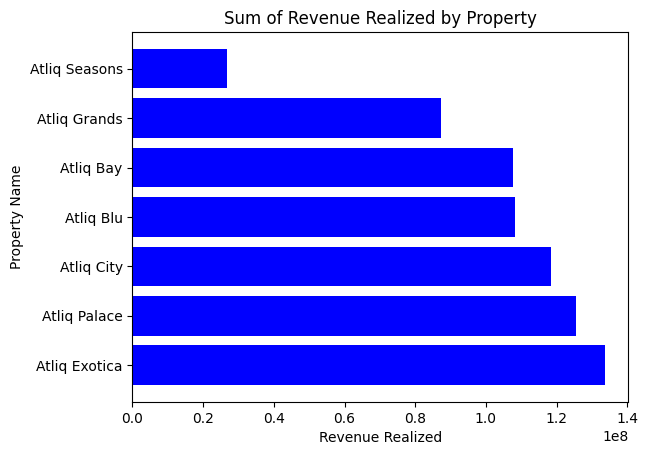

In [282]:
# Print a horizontal bar chart to show the total revenue realized per hotel type
plt.barh(revenue_sum.index, revenue_sum.values, color='blue')  
plt.xlabel('Revenue Realized')  
plt.ylabel('Property Name')  
plt.title('Sum of Revenue Realized by Property')  
plt.show()

#### 8. What is the total revenue realized per hotel type?
- Atliq Exotica emerges as the top-performing hotel with the highest revenue of 133,619,226. It is closely followed by Atliq Palace and Atliq City, which generated revenues of 125,553,143 and 118,290,783, respectively. Atliq Grands secured revenue of 87,245,939, while Atliq Seasons recorded comparatively lower revenue of 26,838,223.

### 9. Create a bar chart to show the average rating per city.

In [283]:
# Display the first few rows of df_all_bookings
df_all_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
3,May012216558RT17,16558,28-04-22,2022-05-01,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
4,May012216558RT18,16558,26-04-22,2022-05-01,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend


In [284]:
# Perform a group-by operation based on the "city".
# Calculate each group's mean value of the "ratings_given" and round the result to two decimal places.
df_all_bookings.groupby("city")["ratings_given"].mean().round(2).sort_values(ascending = False)

city
Delhi        3.79
Mumbai       3.66
Hyderabad    3.65
Bangalore    3.41
Name: ratings_given, dtype: float64

In [285]:
mean_ratings_city = df_all_bookings.groupby("city")["ratings_given"].mean().round(2).sort_values(ascending = False)

Text(0.5, 1.0, 'Mean Ratings by city')

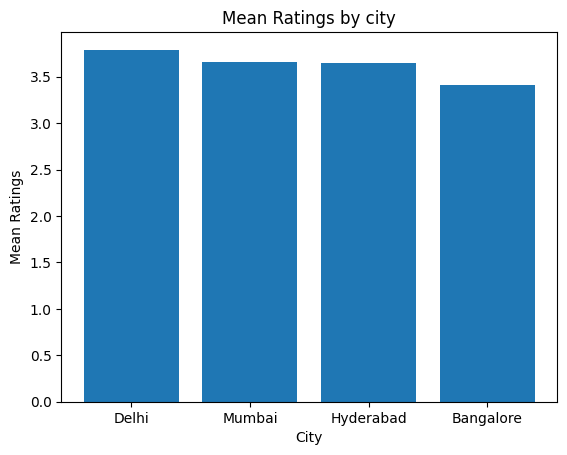

In [286]:
# Create a bar chart
plt.bar(mean_ratings_city.index, mean_ratings_city.values)
plt.xlabel("City")
plt.ylabel("Mean Ratings")
plt.title("Mean Ratings by city")

#### 9. Create a bar chart to show the average rating per city.
- The given result displays the guests' ratings for four cities: Delhi (3.79), Mumbai (3.66), Hyderabad (3.65), and Bangalore (3.41).
- Delhi has the highest rating, while Bangalore has the lowest rating among the four cities.

### 10. Create a pie chart to show the total revenue realized per booking platform.

In [287]:
# Retrieve the unique values from "booking_platform"
df_all_bookings["booking_platform"].unique()

array(['others', 'direct online', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [288]:
# Calculate the total revenue across all booking platforms:
total_revenue = df_all_bookings["revenue_realized"].sum()

In [289]:
# Calculate the percentage of revenue for each booking platform by dividing the revenue of each platform by the total revenue and multiplying by 100
revenue_by_platform = df_all_bookings.groupby("booking_platform")["revenue_realized"].sum()
percentage_by_platform = (revenue_by_platform / total_revenue) * 100
# Print percentage_by_platform
print(percentage_by_platform.round())

booking_platform
direct offline     5.0
direct online     10.0
journey            6.0
logtrip           11.0
makeyourtrip      20.0
others            41.0
tripster           7.0
Name: revenue_realized, dtype: float64


Text(0.5, 1.0, 'Revenue by Booking Platform')

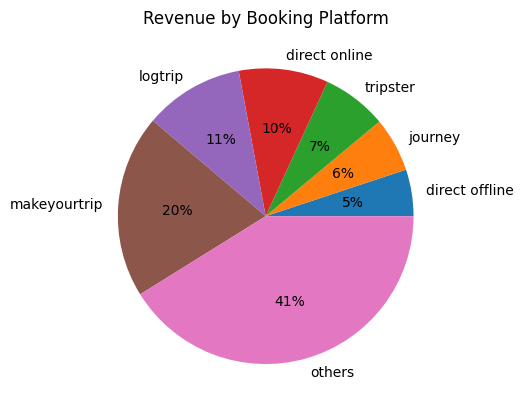

In [290]:
# Plots a pie chart to visualize the distribution of revenue across different booking platforms
average_revenue_platform = df_all_bookings.groupby("booking_platform")["revenue_realized"].sum().sort_values().plot(kind = "pie", autopct='%1.0f%%')
# Remove the  y-label from the chart
average_revenue_platform.set_ylabel('')
# Set the title
average_revenue_platform.set_title("Revenue by Booking Platform")

#### 10. Create a pie chart to show the total revenue realized per booking platform.¶
- "Others" contributed the highest percentage, accounting for 41% of the total revenue.
- "Makeyourtrip" followed with a contributition of 20%.
- "Logtrip" and "diret online" had moderate contributions of 11% and 10%, respectively.
- "Direct online", "joureny" and "direct offline", had relatively lower percentages ranging from 5% to 7%.